# WeatherPy
----

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/Cities_Weather_Data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
# Base URL
b_url="http://api.openweathermap.org/data/2.5/weather?appid="+weather_api_key+ "&units=imperial&q="

# Set up lists for response
cities_found=[]
lat=[]
lng=[]
temp=[]
hum=[]
cloud=[]
wind=[]
country=[]
date=[]

print("Beginning Data Retrieval")
print("-----------------------------")

for each_city in cities:
    ind=cities.index(each_city)+1
    url=b_url+each_city
    response=requests.get(url).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_found.append(response['name'])
        print(f"Processing city #{ind}: {each_city}")
    except:
        print(f"City #{ind} Not Found, Skipped")
#   Wait 1 second before next API call
    time.sleep(1)
print("Data Retrieval Completed")

Beginning Data Retrieval
-----------------------------
Processing city #1: new norfolk
Processing city #2: san cristobal
City #3 Not Found, Skipped
Processing city #4: nikolskoye
City #5 Not Found, Skipped
Processing city #6: rio grande
Processing city #7: sibolga
Processing city #8: ribeira grande
Processing city #9: russkaya polyana
Processing city #10: hobart
Processing city #11: mataura
Processing city #12: calvia
City #13 Not Found, Skipped
Processing city #14: mahebourg
Processing city #15: rikitea
Processing city #16: hilo
Processing city #17: vostok
Processing city #18: vaini
Processing city #19: asfi
Processing city #20: atuona
Processing city #21: port hardy
City #22 Not Found, Skipped
Processing city #23: toora-khem
Processing city #24: tiznit
Processing city #25: yarmouth
Processing city #26: high level
Processing city #27: khotynets
Processing city #28: yellowknife
Processing city #29: hithadhoo
Processing city #30: arraial do cabo
Processing city #31: huilong
Processing c

Processing city #269: rognan
Processing city #270: camapua
Processing city #271: kavieng
Processing city #272: naze
Processing city #273: marystown
City #274 Not Found, Skipped
City #275 Not Found, Skipped
Processing city #276: samarai
Processing city #277: great falls
Processing city #278: chifeng
Processing city #279: krabi
Processing city #280: ketchikan
Processing city #281: hwange
Processing city #282: weligama
Processing city #283: lorengau
Processing city #284: tinskoy
Processing city #285: luanda
Processing city #286: katherine
Processing city #287: nanortalik
Processing city #288: hay river
Processing city #289: gorom-gorom
Processing city #290: santa fe
Processing city #291: seymchan
Processing city #292: burnie
Processing city #293: wisconsin rapids
Processing city #294: taoudenni
Processing city #295: guerrero negro
Processing city #296: kondinskoye
Processing city #297: esperance
Processing city #298: nicoya
Processing city #299: flin flon
Processing city #300: alcaniz
Pro

Processing city #532: darab
Processing city #533: rocha
Processing city #534: fairmont
Processing city #535: kandrian
Processing city #536: port moresby
Processing city #537: chernyshevsk
Processing city #538: nantes
Processing city #539: carberry
Processing city #540: livingstone
Processing city #541: fairlie
Processing city #542: skeldon
Processing city #543: bathsheba
Processing city #544: inhambane
City #545 Not Found, Skipped
Processing city #546: huarmey
Processing city #547: santa maria
Processing city #548: nouadhibou
Processing city #549: kibre mengist
Processing city #550: tongliao
Processing city #551: jonesboro
Processing city #552: loukhi
Processing city #553: bowen
City #554 Not Found, Skipped
Processing city #555: coquimbo
Processing city #556: tanete
Processing city #557: roanoke rapids
Processing city #558: roura
Processing city #559: taikang
Processing city #560: bo rai
Processing city #561: santa cruz
Processing city #562: dandong
Processing city #563: ladovskaya bal

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
weather_dict = {
    "City": cities_found,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":temp,
    "Humidity":hum,
    "Cloudiness":cloud,
    "Wind Speed":wind,
    "Country":country,
    "Date":date
}
# Convert to DataFrame and output to CSV file
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,58.50,69,94,4.00,AU,1627433079
1,San Cristobal,7.7669,-72.2250,73.58,95,25,1.50,VE,1627433155
2,Nikolskoye,59.7035,30.7861,65.01,67,100,4.65,RU,1627433197
3,Rio Grande,-32.0350,-52.0986,41.95,62,5,20.40,BR,1627433604
4,Sibolga,1.7427,98.7792,78.42,86,52,2.24,ID,1627433605
...,...,...,...,...,...,...,...,...,...
566,Nyagan,62.1406,65.3936,45.23,76,23,5.84,RU,1627434322
567,Shibata,37.9500,139.3333,78.08,86,76,7.58,JP,1627434324
568,Maţāy,28.4190,30.7792,79.02,48,0,15.61,EG,1627434325
569,Constitución,-35.3333,-72.4167,45.63,75,0,7.14,CL,1627434326


In [56]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,22.901066,16.240344,69.129825,71.472855,55.618214,7.493485,1.627434e+09
std,33.339313,92.211752,14.035912,19.500172,40.724034,5.309029,3.244093e+02
min,-54.800000,-175.200000,33.930000,9.000000,0.000000,0.000000,1.627433e+09
25%,-4.716400,-65.060750,59.655000,61.000000,9.500000,3.440000,1.627434e+09
50%,32.310000,18.600000,70.540000,74.000000,69.000000,6.170000,1.627434e+09
75%,50.771000,99.942700,80.585000,86.000000,99.000000,10.250000,1.627434e+09
max,78.218600,179.316700,102.340000,100.000000,100.000000,28.810000,1.627434e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# if weather_data["Humidity"].max()>100:
    

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

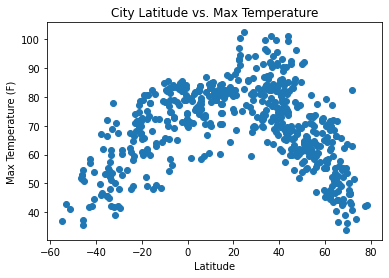

The scatter plot above shows that max temperatures peak at around 30 degrees latitude.


In [58]:
xvals=weather_data['Lat']
yvals=weather_data['Max Temp']
plt.scatter(xvals,yvals)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../output_data/LatTemp.png")

plt.show()
print(f"The scatter plot above shows that max temperatures peak at around 30 degrees latitude.")

## Latitude vs. Humidity Plot

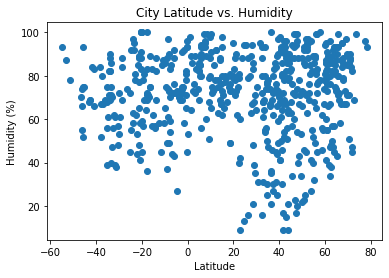

The scatter plot above shows that most cities have more than 50% humidity.


In [59]:
xvals=weather_data['Lat']
yvals=weather_data['Humidity']
plt.scatter(xvals,yvals)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../output_data/LatHumidity.png")

plt.show()
print(f"The scatter plot above shows that most cities have more than 50% humidity.")

## Latitude vs. Cloudiness Plot

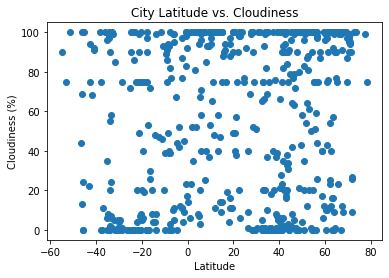

The scatter plot above shows no observable trends between latitude and cloudiness.


In [60]:
xvals=weather_data['Lat']
yvals=weather_data['Cloudiness']
plt.scatter(xvals,yvals)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../output_data/LatCloudiness.png")

plt.show()
print(f"The scatter plot above shows no observable trends between latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

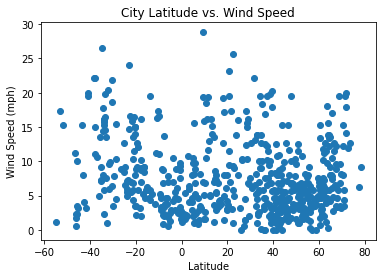

The scatter plot above shows that most cites have wind speeds under 15 MPH.


In [61]:
xvals=weather_data['Lat']
yvals=weather_data['Wind Speed']
plt.scatter(xvals,yvals)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../output_data/LatWind.png")

plt.show()
print(f"The scatter plot above shows that most cites have wind speeds under 15 MPH.")

## Linear Regression

In [62]:
n_weather_data=weather_data[weather_data['Lat']>=0]
s_weather_data=weather_data[weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

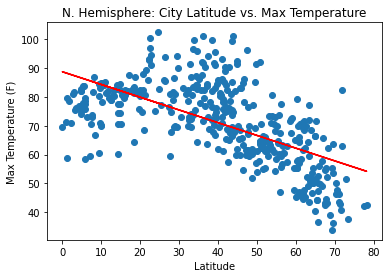

y = -0.44x + 89


In [63]:
xvals=n_weather_data['Lat']
yvals=n_weather_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(xvals,yvals)
regressvals=xvals*slope + intercept
line_eq=f'y = {round(slope,2)}x + {round(intercept)}'

plt.scatter(xvals,yvals)
plt.plot(xvals, regressvals,"r-")
plt.title('N. Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig("../output_data/Regress_N_LatTemp.png")

plt.show()
print(line_eq)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

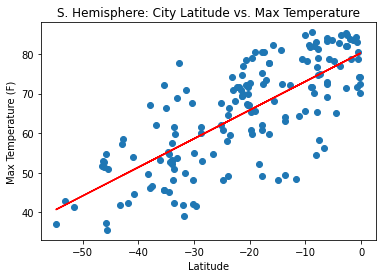

y = 0.72x + 80


In [64]:
xvals=s_weather_data['Lat']
yvals=s_weather_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(xvals,yvals)
regressvals=xvals*slope + intercept
line_eq=f'y = {round(slope,2)}x + {round(intercept)}'

plt.scatter(xvals,yvals)
plt.plot(xvals, regressvals,"r-")
plt.title('S. Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig("../output_data/Regress_S_LatTemp.png")

plt.show()
print(line_eq)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

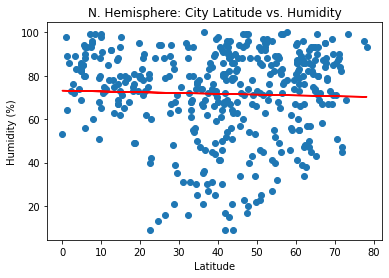

y = -0.04x + 73


In [65]:
xvals=n_weather_data['Lat']
yvals=n_weather_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(xvals,yvals)
regressvals=xvals*slope + intercept
line_eq=f'y = {round(slope,2)}x + {round(intercept)}'

plt.scatter(xvals,yvals)
plt.plot(xvals, regressvals,"r-")
plt.title('N. Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("../output_data/Regress_N_LatHumidity.png")

plt.show()
print(line_eq)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

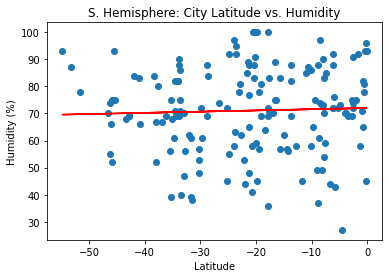

y = 0.04x + 72


In [66]:
xvals=s_weather_data['Lat']
yvals=s_weather_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(xvals,yvals)
regressvals=xvals*slope + intercept
line_eq=f'y = {round(slope,2)}x + {round(intercept)}'

plt.scatter(xvals,yvals)
plt.plot(xvals, regressvals,"r-")
plt.title('S. Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("../output_data/Regress_S_LatHumidity.png")

plt.show()
print(line_eq)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

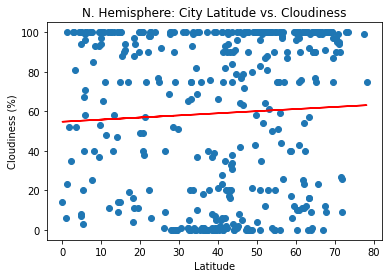

y = 0.11x + 55


In [67]:
xvals=n_weather_data['Lat']
yvals=n_weather_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(xvals,yvals)
regressvals=xvals*slope + intercept
line_eq=f'y = {round(slope,2)}x + {round(intercept)}'

plt.scatter(xvals,yvals)
plt.plot(xvals, regressvals,"r-")
plt.title('N. Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("../output_data/Regress_N_LatCloudiness.png")

plt.show()
print(line_eq)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

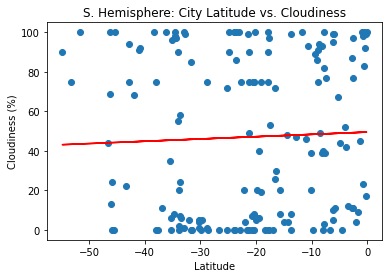

y = 0.12x + 49


In [68]:
xvals=s_weather_data['Lat']
yvals=s_weather_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(xvals,yvals)
regressvals=xvals*slope + intercept
line_eq=f'y = {round(slope,2)}x + {round(intercept)}'

plt.scatter(xvals,yvals)
plt.plot(xvals, regressvals,"r-")
plt.title('S. Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("../output_data/Regress_S_LatCloudiness.png")

plt.show()
print(line_eq)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

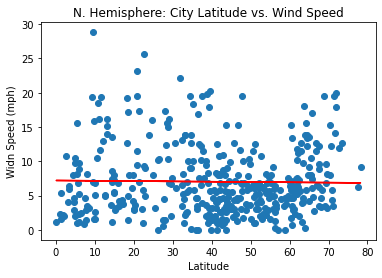

y = -0.0x + 7


In [69]:
xvals=n_weather_data['Lat']
yvals=n_weather_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(xvals,yvals)
regressvals=xvals*slope + intercept
line_eq=f'y = {round(slope,2)}x + {round(intercept)}'

plt.scatter(xvals,yvals)
plt.plot(xvals, regressvals,"r-")
plt.title('N. Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Widn Speed (mph)')

plt.savefig("../output_data/Regress_N_LatWind.png")

plt.show()
print(line_eq)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

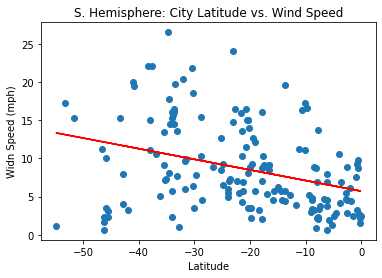

y = -0.14x + 6


In [70]:
xvals=s_weather_data['Lat']
yvals=s_weather_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(xvals,yvals)
regressvals=xvals*slope + intercept
line_eq=f'y = {round(slope,2)}x + {round(intercept)}'

plt.scatter(xvals,yvals)
plt.plot(xvals, regressvals,"r-")
plt.title('S. Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Widn Speed (mph)')

plt.savefig("../output_data/Regress_S_LatWind.png")

plt.show()
print(line_eq)